In [ ]:
# Idea from: https://math.stackexchange.com/questions/156161/finding-the-coordinates-of-points-from-distance-matrix
# Eigenvalue decomposition in Python: https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.7-Eigendecomposition/


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def get_od(points):
    npts = np.max(points.shape)
    od = np.zeros((npts, npts))
    for i in range(npts):
        for j in range(npts):
            od[i,j] = np.linalg.norm(points[i,:] - points[j,:])
    return od

In [4]:
def get_M(D):
    n,m = D.shape
    M = np.zeros((n,m))
    for i in range(n):
        for j in range(m):
            M[i,j] = (D[0,j]**2 + D[i,0]**2 - D[i,j]**2)/2
    return M

In [5]:
def coords_from_M(M):
    lambd, U = np.linalg.eig(M) # Eigenvalue decomposition
    S = np.round(np.diag(lambd),8)
    # S = np.diag(lambd)
    X = U.dot(np.sqrt(S))
    return X

In [6]:
def coords_from_od(od):
    M = get_M(od)
    return coords_from_M(M)

In [13]:
from read_helper_functions import read_ait_h_instance
file_to_read = '18-4-l-2a'
inst = read_ait_h_instance(file_to_read)
nbc = inst.NbClients

T = np.zeros((nbc + 2, nbc + 2))
T[:nbc+1,:nbc+1] = inst.od

# Complete last column and last row:
T[nbc+1,:] = T[0,:] # Last row equal to first
T[:, nbc+1] = T[:,0] # Last column equal to column

new_points = coords_from_od(T)
print(new_points)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00             nan
   0.00000000e+00             nan  0.00000000e+00  0.00000000e+00
              nan  0.00000000e+00  0.00000000e+00  0.00000000e+00
              nan             nan             nan  0.00000000e+00
   0.00000000e+00             nan  0.00000000e+00  0.00000000e+00]
 [-2.05518226e+01 -1.07286093e+00 -4.02757546e+00             nan
  -3.62318604e-01             nan  1.67089264e+00 -2.53375934e+00
              nan  2.12926392e-01  1.03498603e+00  1.04781901e-01
              nan             nan             nan -1.92622661e-01
   8.71523589e-02             nan  0.00000000e+00  0.00000000e+00]
 [-5.01898609e+00 -1.74326716e+01 -4.25638829e-01             nan
  -3.62872169e-01             nan -2.71037855e+00  3.15300280e-01
              nan  1.03049126e-01  6.37980399e-01  2.12512442e-01
              nan             nan             nan -2.42256645e-02
   2.07788183e-02             nan  0.00000000e+00  0.00000000e+00]
 [-1.90

C:\Apps\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


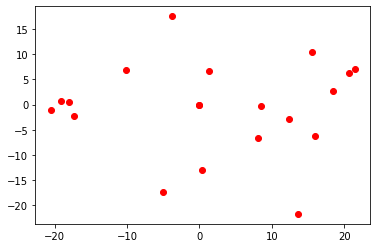

In [14]:
plt.plot(new_points[:,0], new_points[:,1], 'ro')

In [10]:
new_od = get_od(new_points)

In [12]:
np.round(T - new_od,4)

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, n